# Movies Clustering

- Ricardo Méndez 21289
- Sara Echeverría 21371
- Sebastián Juárez 21471

Enlace al repositorio: https://github.com/bl33h/moviesClustering

In [2]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
plt.style.use('ggplot')

C:\Users\euroc\AppData\Local\Temp\ipykernel_16088\1689198392.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv('data/movies.csv', encoding='latin1')
df.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48


### 1. Haga el preprocesamiento del dataset, explique qué variables no aportan información a la generación de grupos y por qué. Describa con qué variables calculará los grupos.

In [5]:
print(df.columns)

Index(['id', 'budget', 'genres', 'homePage', 'productionCompany',
       'productionCompanyCountry', 'productionCountry', 'revenue', 'runtime',
       'video', 'director', 'actors', 'actorsPopularity', 'actorsCharacter',
       'originalTitle', 'title', 'originalLanguage', 'popularity',
       'releaseDate', 'voteAvg', 'voteCount', 'genresAmount',
       'productionCoAmount', 'productionCountriesAmount', 'actorsAmount',
       'castWomenAmount', 'castMenAmount'],
      dtype='object')


In [6]:
features = df.copy()
columns_to_drop = ['genres', 'homePage','productionCompany','productionCompanyCountry','productionCountry','video','director','actors','actorsCharacter',
        'originalTitle', 'title', 'originalLanguage','releaseDate','castMenAmount', 'castWomenAmount', 'actorsPopularity']
features = features.drop(columns=columns_to_drop)
print(features)

          id    budget      revenue  runtime  popularity  voteAvg  voteCount  \
0          5   4000000    4257354.0       98      20.880      5.7       2077   
1          6  21000000   12136938.0      110       9.596      6.5        223   
2         11  11000000  775398007.0      121     100.003      8.2      16598   
3         12  94000000  940335536.0      100     134.435      7.8      15928   
4         13  55000000  677387716.0      142      58.751      8.5      22045   
...      ...       ...          ...      ...         ...      ...        ...   
9995  920081         0          0.0      100      16.662      6.8        108   
9996  920143         0          0.0       97     491.706      1.5          2   
9997  922017         0          0.0      112     565.658      6.1         30   
9998  922162         0          0.0       59       9.664      6.0          1   
9999  922260    254056     254042.0        0      83.747      4.7          3   

      genresAmount  productionCoAmount 

In [7]:
df.describe()

,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,249876.829300,1.855163e+07,5.673793e+07,100.268100,51.393907,6.483490,1342.381800,2.596500,3.171400,1.751000,2147.666600
std,257380.109004,3.662669e+07,1.495854e+08,27.777829,216.729552,0.984274,2564.196637,1.154565,2.539738,3.012093,37200.075802
min,5.000000,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12286.500000,0.000000e+00,0.000000e+00,90.000000,14.577750,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000
50%,152558.000000,5.000000e+05,1.631245e+05,100.000000,21.905500,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000
75%,452021.750000,2.000000e+07,4.479661e+07,113.000000,40.654000,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000
max,922260.000000,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   budget                     10000 non-null  int64  
 2   genres                     9947 non-null   object 
 3   homePage                   4193 non-null   object 
 4   productionCompany          9543 non-null   object 
 5   productionCompanyCountry   8720 non-null   object 
 6   productionCountry          9767 non-null   object 
 7   revenue                    10000 non-null  float64
 8   runtime                    10000 non-null  int64  
 9   video                      9514 non-null   object 
 10  director                   9926 non-null   object 
 11  actors                     9920 non-null   object 
 12  actorsPopularity           9913 non-null   object 
 13  actorsCharacter            9953 non-null   obje

A criterio propio y considerando tanto el tipo de dato de cada una de las variables, como su papel en el dataset, es posible especular su clasificación de la siguiente manera:

- Variables no útiles para clustering
    - [originalLanguage, video, director, actors, actorsCharacter]
        - A pesar de que manifiestan insights cualitativos, su variabilidad y naturaleza categórica complican su uso directo en el clustering sin una transformación adecuada.

- Variables irrelevantes para clustering
    - [id, originalTitle, title, homePage, releaseDate (depende del contexto)]
        - Pues son id's o URLs que no aportan información agrupable sobre las características importantes de las películas.

- Variables útiles para clustering
    - [popularity, budget, revenue, runtime, genresAmount, productionCoAmount, productionCountriesAmount, voteCount, voteAvg, actorsPopularity, castWomenAmount, castMenAmount, releaseDate (el año)]
        - Ya que al ser variables cuantitativas, estas ofrecen una base sólida para agrupar las películas basándose en popularidad, aspectos financieros, contenido, involucrados y recepción del público.

### 2. Analice la tendencia al agrupamiento usando el estadístico de Hopkings y la VAT (Visual Assessment of cluster Tendency). Discuta sus resultados e impresiones.

### 3. Determine cuál es el número de grupos a formar más adecuado para los datos que está trabajando. Haga una gráfica de codo y explique la razón de la elección de la cantidad de clústeres con la que trabajará.

In [9]:
dist_sums = []
K = range(1,11)
for k in K:
    km = KMeans(k)
    km = km.fit(features)
    dist_sums.append(km.inertia_)

In [10]:
dist_sums

[2.3715007878094576e+20,
 9.06861886997235e+19,
 4.7730333503750275e+19,
 3.338010752467813e+19,
 2.241878440599434e+19,
 1.7600426024851372e+19,
 1.3986736722834952e+19,
 1.1303019003244673e+19,
 1.000715228920651e+19,
 9.36910840629262e+18]

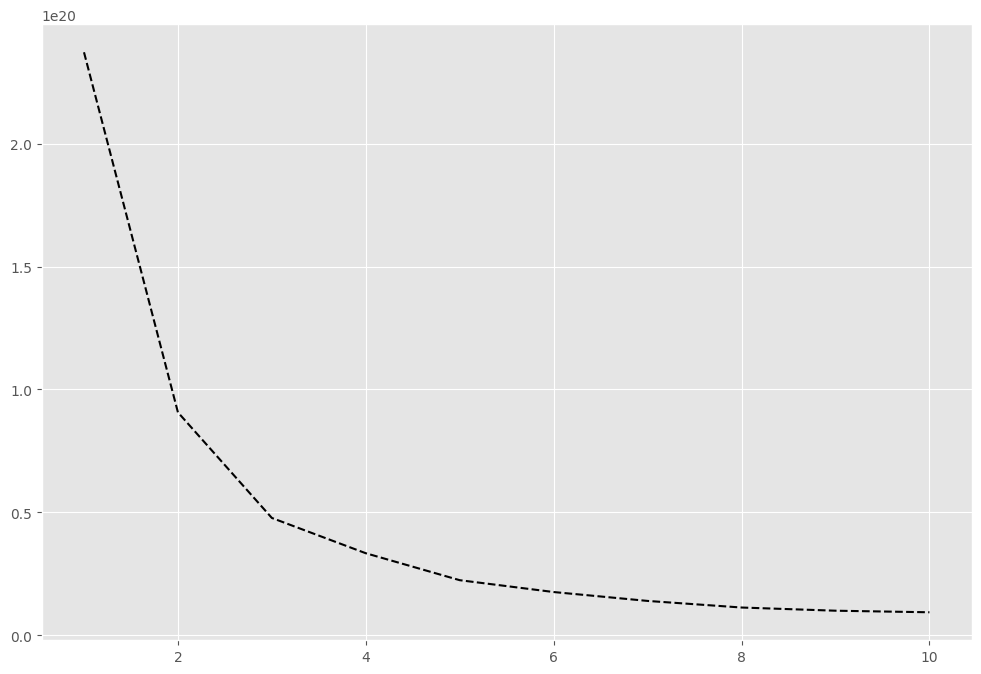

In [11]:
figure = plt.figure(figsize=(12,8))
plt.plot(K,dist_sums, 'k--')

##### La gráfica de codo indica el número de clusters óptimo a utilizar. Esto se debe a que evalúa métodos anteriormente implementados con distintas cantidades de clusters. En este caso se empleó un rago de 1 a 10. Se puede observar que el momento en que la pendiente de la gráfica disminuye es en k=3, por lo que será nuestro k a utilizar en los siguientes modelos.

### 4. Utilice los algoritmos k-medias y clustering jerárquico para agrupar. Compare los resultados generados por cada uno.

In [12]:
n_clusters = 3

k_means = KMeans(n_clusters=n_clusters)
k_means.fit(features)

KMeans(n_clusters=3)

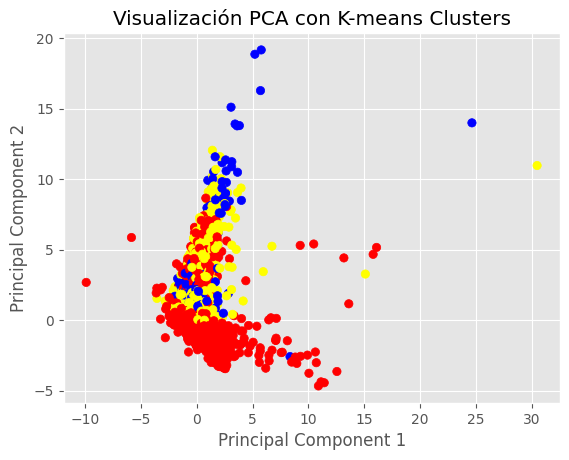

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

cluster_colors = {0: 'red', 1: 'blue', 2: 'yellow'}
cmap = ListedColormap([cluster_colors[label] for label in range(len(cluster_colors))])


plt.scatter(df_pca[:, 1], df_pca[:, 0], c=km.labels_, cmap=cmap)
plt.title('Visualización PCA con K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


##### Se puede ver que ni ajustando las features utilizando PCA es posible ver un clustering definido. Esto se debe a la gran cantidad de variables que se emplearon, pues no es sencillo ni eficiente escalarlas a solamente dos variables para poder graficarlo.

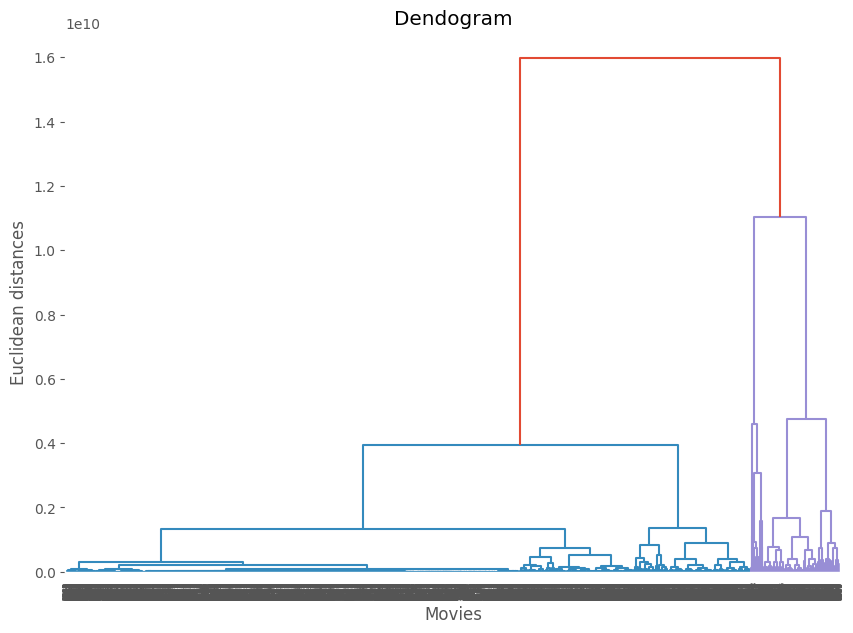

In [15]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
dendogram = sch.dendrogram(sch.linkage(features, method='ward'))
plt.title('Dendogram')
plt.xlabel('Movies')
plt.ylabel('Euclidean distances')
plt.show()

##### En el dendograma se pueden ver solo dos líneas provenientes de la raíz. El principal uso de este gráfico es revisar cuántas lineas son igual o más pequeñas que la línea con mayor longitud encontrada, pues ese número será el número de clusters. En este caso, la línea del grupo azul es la más larga y solo existe una línea más que es más corta. Por ello, el número de clusters es 2.

In [18]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cl = cluster.fit_predict(features)

In [22]:
km_score = silhouette_score(features, k_means.labels_)

hier_score = silhouette_score(features, cl)

print('K-means silhouette score:', km_score)
print('Hierarchical silhouette score:', hier_score)



K-means silhouette score: 0.8040448553275855
Hierarchical silhouette score: 0.8082963086675405


### 5. Determine la calidad del agrupamiento hecho por cada algoritmo con el método de la silueta. Discuta los resultados.

In [ ]:
df['primary_genre'] = df['genres'].apply(lambda x: x.split('|')[0])

# Algoritmo de k-medias
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
kmeans_labels = kmeans.labels_

# Algoritmo de clustering jerárquico
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_clustering.fit(df)
agg_labels = agg_clustering.labels_

# Score de las siluetas 
silhouette_kmeans = silhouette_score(df, kmeans_labels)
silhouette_agg = silhouette_score(df, agg_labels)


print("Puntuación de la silueta para K-medias:", silhouette_kmeans)
print("Puntuación de la silueta para Clustering Jerárquico:", silhouette_agg)


### 6. Interprete los grupos basado en el conocimiento que tiene de los datos. Recuerde investigar las medidas de tendencia central de las variables continuas y las tablas de frecuencia de las variables categóricas pertenecientes a cada grupo. Identifique hallazgos interesantes debido a las agrupaciones y describa para qué le podría servir.